# Libraries

In [1]:
from utils import *

'''Plots settings'''
L = Leonardo()
plt.style.use(gstyle + 'dark-theme.mplstyle')
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = font_manager.FontProperties(fname=font_path).get_name()

# Data overview and background

Dataset from kaggle:
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

# Read data

In [2]:
train = pd.read_csv('../data/hr-analytics/aug_train.csv')

In [3]:
train.shape

(19158, 14)

# Features engineering

### Imputing missing values

In [4]:
train.loc[:,train.isna().any()]

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,NaN,Full time course,Graduate,STEM,5,NaN,NaN,never
3,NaN,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...
19153,Male,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,Male,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,Male,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [5]:
# for now
train = train.dropna().copy()

In [6]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [7]:
train['target'] = train['target'].map({1.0:'1',0.0:'0'})

In [8]:
train.replace(
    {
    'experience': 
        {'>20':20,
         '<1':0
         }
        },inplace=True)

# EDA

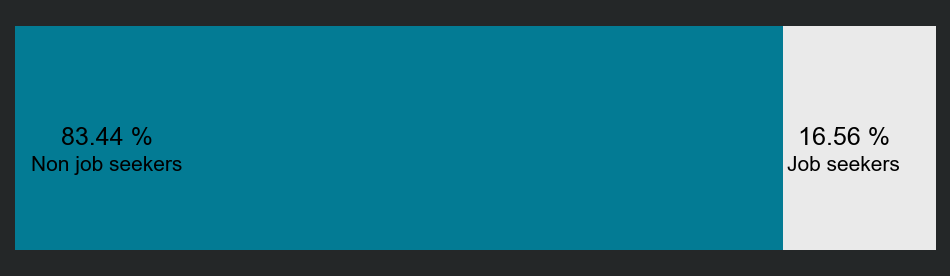

In [16]:
L.binary_ratio_plot(train,'target','Non job seekers','Job seekers',font_color='black')


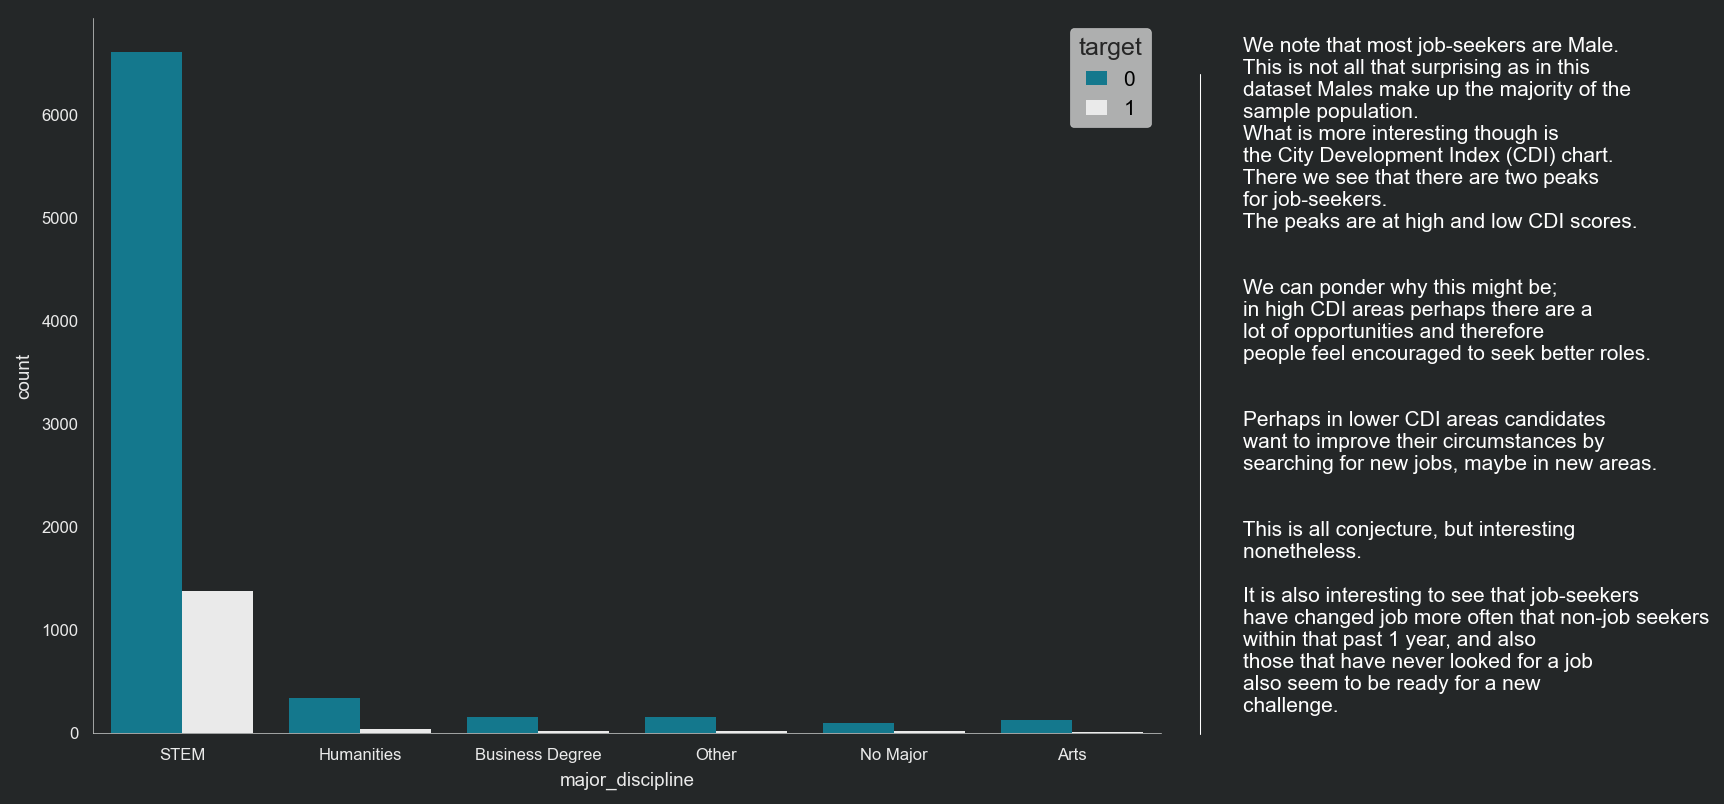

In [17]:
fig, ax = plt.subplots(1,1, dpi=150)
sns.countplot(train,x='major_discipline',hue='target')
L.insights_box(fig,
               text_x=0.95,
               text_y=0.1,
               text_color='white',
               font_weight='normal',
               text="""
                    We note that most job-seekers are Male.
                    This is not all that surprising as in this
                    dataset Males make up the majority of the
                    sample population.
                    What is more interesting though is
                    the City Development Index (CDI) chart.
                    There we see that there are two peaks
                    for job-seekers. 
                    The peaks are at high and low CDI scores. 


                    We can ponder why this might be;
                    in high CDI areas perhaps there are a 
                    lot of opportunities and therefore
                    people feel encouraged to seek better roles.


                    Perhaps in lower CDI areas candidates
                    want to improve their circumstances by
                    searching for new jobs, maybe in new areas. 


                    This is all conjecture, but interesting
                    nonetheless.

                    It is also interesting to see that job-seekers
                    have changed job more often that non-job seekers
                    within that past 1 year, and also
                    those that have never looked for a job
                    also seem to be ready for a new
                    challenge.
                    """)

# AutoML